In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression

In [292]:
features = ["IP", "H", "R", "ER", "BB", "SO", "HR", "HBP", "Pit", "Str", "GB", "FB", "LD", "PU"]

In [293]:
cole_13 = pd.read_csv(open('cole_2013.csv'), usecols = features)
cole_14 = pd.read_csv(open('cole_2014.csv'), usecols = features)
cole_15 = pd.read_csv(open('cole_2015.csv'), usecols = features)
cole_16 = pd.read_csv(open('cole_2016.csv'), usecols = features)
cole_17 = pd.read_csv(open('cole_2017.csv'), usecols = features)
cole_18 = pd.read_csv(open('cole_2018.csv'), usecols = features)
cole_19 = pd.read_csv(open('cole_2019.csv'), usecols = features)
cole_20 = pd.read_csv(open('cole_2020.csv'), usecols = features)
cole_21 = pd.read_csv(open('cole_2021.csv'), usecols = features)
cole_22 = pd.read_csv(open('cole_2022.csv'), usecols = features)
cole_23 = pd.read_csv(open('cole_2023.csv'), usecols = features)

In [294]:
cole_13.insert(0, "Yr", 2013)
cole_13.insert(1, "Tm", 'PIT')
cole_14.insert(0, "Yr", 2014)
cole_14.insert(1, "Tm", 'PIT')
cole_15.insert(0, "Yr", 2015)
cole_15.insert(1, "Tm", 'PIT')
cole_16.insert(0, "Yr", 2016)
cole_16.insert(1, "Tm", 'PIT')
cole_17.insert(0, "Yr", 2017)
cole_17.insert(1, "Tm", 'PIT')
cole_18.insert(0, "Yr", 2018)
cole_18.insert(1, "Tm", 'HOU')
cole_19.insert(0, "Yr", 2019)
cole_19.insert(1, "Tm", 'HOU')
cole_20.insert(0, "Yr", 2020)
cole_20.insert(1, "Tm", 'NYY')
cole_21.insert(0, "Yr", 2021)
cole_21.insert(1, "Tm", 'NYY')
cole_22.insert(0, "Yr", 2022)
cole_22.insert(1, "Tm", 'NYY')
cole_23.insert(0, "Yr", 2023)
cole_23.insert(1, "Tm", 'NYY')

In [295]:
df = pd.concat([cole_13, cole_14, cole_15, cole_16, cole_17, cole_18, cole_19, cole_20, cole_21, cole_22, cole_23])
df = df.reset_index()

In [385]:
x = df.loc[:, features].values
y = df.loc[:,['Yr']].values

x = StandardScaler().fit_transform(x)

In [386]:
pca = PCA(n_components = 10)
pca = pca.fit(x)
pcs = pca.fit_transform(x)
pcDf = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10'])
finalDf = pd.concat([pcDf, df[['Yr']], df[['Tm']]], axis = 1)
print(pca.explained_variance_ratio_)
finalDf

[0.26953065 0.17959588 0.12846808 0.0993467  0.07620285 0.07189542
 0.06239129 0.04207122 0.02740917 0.01917412]


,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,Yr,Tm
0,1.472816,-0.521462,3.306375,-0.451022,-0.253923,1.741455,1.072596,0.232093,-0.274611,0.413698,2013,PIT
1,2.636508,0.373007,2.721020,-0.590776,-1.472000,0.190782,-0.289959,-0.196808,-0.508573,1.141284,2013,PIT
2,0.442252,1.155830,1.340300,-0.761332,-1.017550,-0.609411,0.816185,0.225303,-0.166577,-0.403415,2013,PIT
3,1.945597,-0.015725,1.945531,-0.993087,2.140413,0.424428,0.352282,0.352772,-0.412957,-0.364243,2013,PIT
4,2.457091,0.364424,2.000090,0.997984,-1.115328,0.469697,-0.866967,-1.075940,-0.134742,-1.115912,2013,PIT
...,...,...,...,...,...,...,...,...,...,...,...,...
275,1.069417,0.869124,-0.042375,-0.529610,-0.263455,-0.904063,0.336913,1.130143,1.137744,0.777244,2023,NYY
276,-0.257303,-2.260539,1.963942,2.516719,0.092095,-0.338166,-1.404433,-0.268700,1.235876,-0.909526,2023,NYY
277,3.272063,-0.238973,-0.831468,0.979224,0.460934,-1.148905,0.425347,0.648616,0.058856,0.869246,2023,NYY
278,1.568847,0.682487,-2.872672,1.684252,0.103304,-0.416588,0.649527,0.213111,-1.062651,-0.136031,2023,NYY


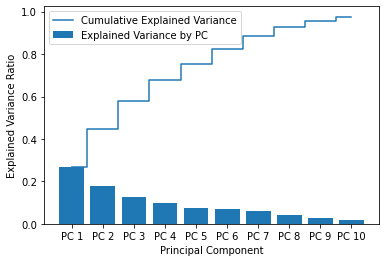

In [301]:
plt.bar(['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10'], pca.explained_variance_ratio_, label='Explained Variance by PC')
plt.step(range(0,len(np.cumsum(pca.explained_variance_ratio_))), np.cumsum(pca.explained_variance_ratio_), where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.legend()
plt.savefig("expvar.png")

In [302]:
pc1 = dict(zip(features, np.round(pca.components_[0], 3)))
pc2 = dict(zip(features, np.round(pca.components_[1], 3)))
pc3 = dict(zip(features, np.round(pca.components_[2], 3)))

loadings = pd.DataFrame.from_dict([pc1, pc2, pc3])
loadings

,IP,H,R,ER,BB,SO,HR,HBP,Pit,Str,GB,FB,LD,PU
0,-0.339,0.356,0.425,0.430,0.080,-0.325,0.234,0.016,-0.227,-0.251,0.032,0.190,0.250,-0.105
1,-0.343,-0.335,-0.072,-0.063,0.167,0.017,0.005,-0.005,-0.423,-0.456,-0.265,-0.391,-0.340,-0.082
2,0.054,0.044,-0.319,-0.320,-0.104,-0.462,-0.416,0.137,-0.293,-0.280,0.367,0.129,0.241,0.043


Text(0.5, 1.0, 'Scree Plot')

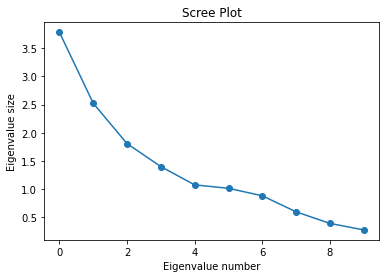

In [278]:
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

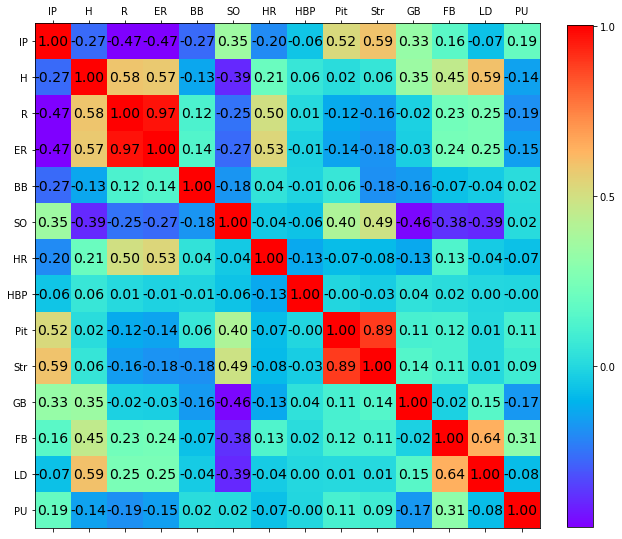

In [387]:
cov_data = np.cov(x.T)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(cax, ticks = [-1, -0.5, 0, 0.5, 1], fraction=0.045)

for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=14, color='black', ha="center", va="center")
        
xaxis = np.arange(len(features))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(features)
ax.set_yticklabels(features)

plt.savefig("covmat.png")
plt.show()

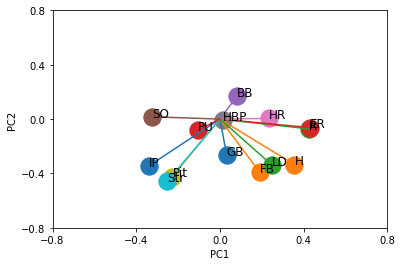

In [388]:
# Get the loadings of x and y axes
xs = loadings.iloc[0]
ys = loadings.iloc[1]
 
# Plot the loadings
for i, varnames in enumerate(features):
    plt.scatter(xs[i], ys[i], s=300)
    plt.plot([0, xs[i]], [0, ys[i]])
    plt.text(xs[i], ys[i], varnames, size = 12)
    
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
plt.savefig('biplot2d.png')

# Show plot
plt.show()

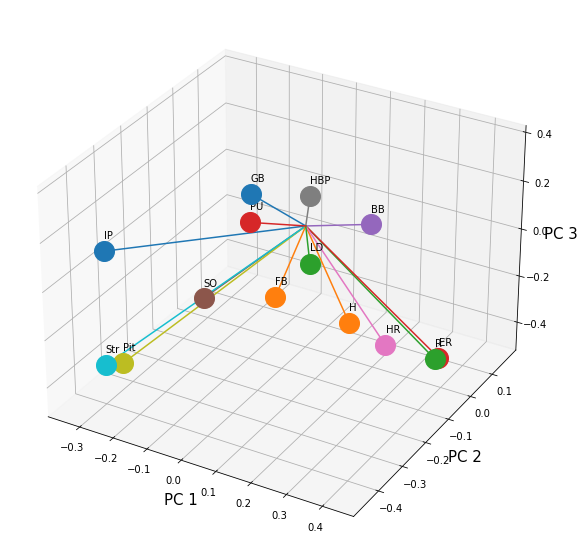

In [389]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

xs = loadings.iloc[0]
ys = loadings.iloc[1]
zs = loadings.iloc[2]
 
for i, names in enumerate(features):
    ax.scatter(xs[i], ys[i], zs[i], s = 400)
    ax.plot([0, xs[i]], [0, ys[i]],zs=[0, zs[i]])
    ax.text(xs[i], ys[i], zs[i]+0.05, names)
 
ax.set_xlabel('PC 1', fontsize=15)
ax.set_ylabel('PC 2', fontsize=15)
ax.set_zlabel('PC 3', fontsize=15)
 
plt.savefig('biplot3d.png')
plt.show()

In [376]:
df.iloc[245]

index      11
Yr       2022
Tm        NYY
IP        2.1
H           8
R           7
ER          7
BB          2
SO          3
HR          5
HBP         0
Pit        70
Str        45
GB          4
FB          8
LD          2
PU          1
Name: 245, dtype: object

In [375]:
for i in range (2013, 2024):
    print(i)
    print(np.mean(finalDf[(finalDf['Yr'] == i)]['PC 3']))

2013
1.2432976851159356
2014
0.41470586393145353
2015
0.7097837898629439
2016
1.162853875861971
2017
0.0805050530400668
2018
-0.5575672311115666
2019
-0.9140477796255546
2020
-0.5329749408168252
2021
-0.4297469064059984
2022
-0.564245374550214
2023
0.25985134789382935


Text(0, 0.5, 'PC2')

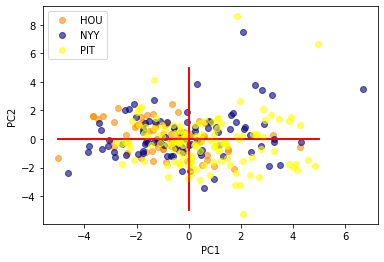

In [382]:
colors = ['darkorange', 'navy', 'yellow']
groups = finalDf.groupby('Tm')
i = 0
        
for name, group in groups:
    plt.plot(group['PC 1'], group['PC 2'], c = colors[i], marker='o', linestyle='', alpha = 0.6, label=name)
    plt.plot([-5, 5], [0, 0], c='r')
    plt.plot([0, 0], [-5, 5], c = 'r')
    i += 1
    plt.legend()
    
plt.xlabel('PC1')
plt.ylabel('PC2')

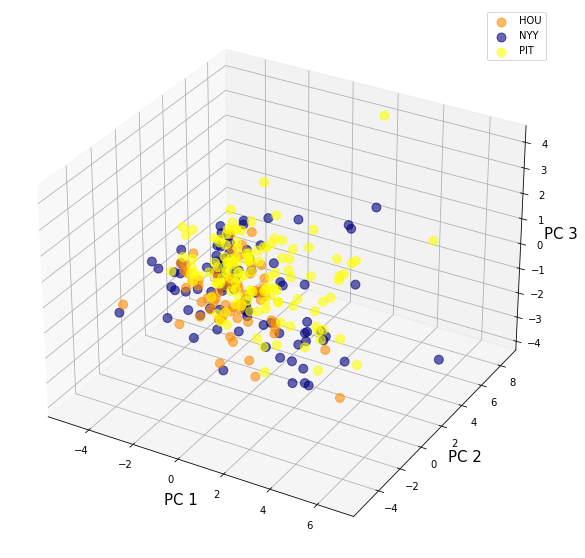

In [383]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
i = 0

for name, group in groups:
    ax.scatter3D(group['PC 1'], group['PC 2'],group['PC 3'], c = colors[i], alpha = 0.6, s = 80, label=name)
    i += 1

#ax.plot([-5, 5], [0, 0],zs=[0, 0], c = 'k')
#ax.plot([0, 0],[-6, 5], zs=[0, 0], c = 'k')
#ax.plot([0, 0],[0, 0], zs=[-5, 5], c = 'k')
    
ax.set_xlabel("PC 1", fontsize=15)
ax.set_ylabel("PC 2", fontsize=15)
ax.set_zlabel("PC 3", fontsize=15)
plt.legend()
plt.show()